## ***MODEL PERFORMANCE***

### **Required Libraries**

In [46]:
import sys
import os
project_path = os.path.abspath("../../workshop_3")
sys.path.append(project_path)

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import joblib
from utils.connection_db import get_data
import seaborn as sns

### **Load data**

In [48]:
model = joblib.load("../model/model.pkl")

df = get_data()
df.head(10)

Successful connection to the database.
Data obtained


,id,year,gdp_per_capita,social_support,healthy_life_expectancy,freedom,corruption,generosity,america,asia,europe,oceania,central_america,north_america,south_america,happiness_score,predicted_happiness_score,created_at
0,1,2016,0.90145,0.660620,0.540000,0.143960,0.065470,0.279920,0,0,1,0,0,0,0,5.401,4.68375,2025-05-20 02:29:02
1,2,2018,0.47400,1.166000,0.598000,0.292000,0.034000,0.187000,0,1,0,0,0,0,0,5.199,4.85508,2025-05-20 02:29:02
2,3,2017,1.00727,0.868351,0.613212,0.289681,0.086723,0.049693,0,0,0,0,0,0,0,4.805,5.23328,2025-05-20 02:29:02
3,4,2015,0.59448,1.015280,0.618260,0.328180,0.016150,0.209510,0,0,1,0,0,0,0,5.889,5.37788,2025-05-20 02:29:02
4,5,2015,0.79907,1.202780,0.673900,0.251230,0.029610,0.152750,0,0,1,0,0,0,0,4.681,5.28792,2025-05-20 02:29:02
5,6,2019,0.27400,0.916000,0.555000,0.148000,0.041000,0.169000,0,0,0,0,0,0,0,3.933,4.16569,2025-05-20 02:29:02
6,7,2018,0.42500,1.228000,0.539000,0.526000,0.078000,0.302000,0,1,0,0,0,0,0,4.880,4.84420,2025-05-20 02:29:02
7,8,2015,0.21102,1.132990,0.338610,0.457270,0.072670,0.290660,0,0,0,0,0,0,0,3.931,4.52499,2025-05-20 02:29:02
8,9,2019,1.38000,1.624000,1.026000,0.591000,0.118000,0.354000,0,0,1,0,0,0,0,7.494,7.33375,2025-05-20 02:29:02
9,10,2017,1.28601,1.343130,0.687763,0.175864,0.036637,0.078402,0,0,1,0,0,0,0,5.324,5.42612,2025-05-20 02:29:02


### **Data preparation**

In [49]:
x = df.drop(columns=["id", "predicted_happiness_score", "created_at", "happiness_score"])
y_true = df["happiness_score"]
y_pred =df["predicted_happiness_score"]

In [50]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Model metrics:\n")
print(f"MSE(Mean squared error):            {mse:.4f}")
print(f"RMSE(Root mean squared error):      {rmse:.4f}")
print(f"MAE(Mean absolute error):           {mae:.4f}")
print(f"R2(Coefficient of determination):   {r2:.4f}")


Model metrics:

MSE(Mean squared error):            0.1715
RMSE(Root mean squared error):      0.4142
MAE(Mean absolute error):           0.3259
R2(Coefficient of determination):   0.8623


### **Graphics and visualizations**

In [51]:
regressor = model.named_steps["model"]

feature_names = model.named_steps["scaler"].get_feature_names_out(
    input_features=model.feature_names_in_
)

importances = regressor.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

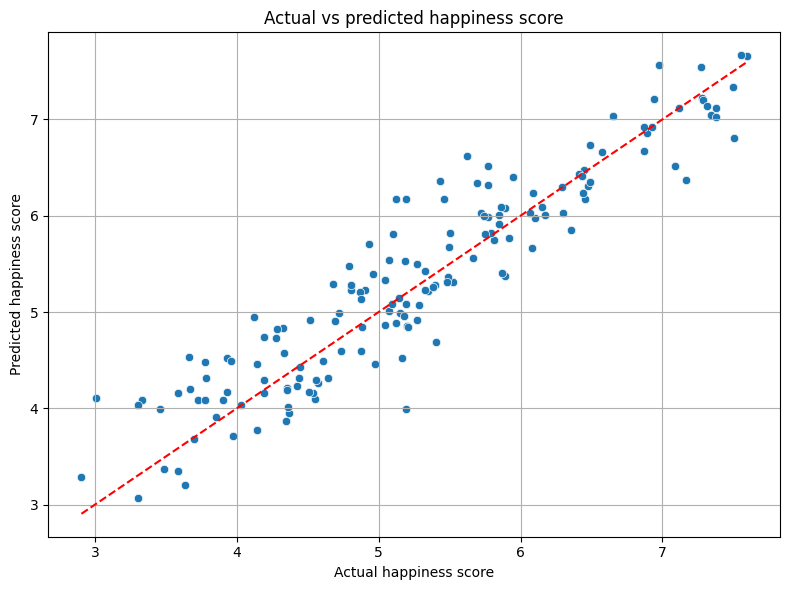

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual happiness score")
plt.ylabel("Predicted happiness score")
plt.title("Actual vs predicted happiness score")
plt.grid()
plt.tight_layout()
plt.show()


The graph presented compares the actual values of the happiness score versus the values predicted by the selected regression model. The dotted red line represents the ideal diagonal where the predictions would exactly match the actual values (Y = X).

We can observe that most of the points cluster closely around this line, indicating a high correlation between the predictions and the actual values. This is a clear sign that the model has a good ability to generalize and make accurate predictions on unseen data. While there are some deviations and slight dispersion at the extremes-which is to be expected in complex social phenomena such as happiness-no systematic patterns of error or obvious signs of bias are detected.

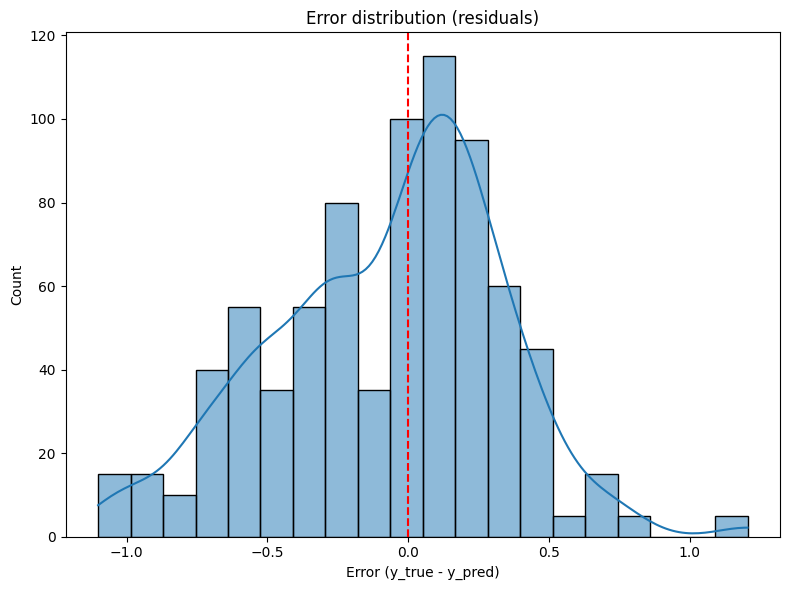

In [64]:
residuals = y_true - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Error distribution (residuals)")
plt.xlabel("Error (y_true - y_pred)")
plt.tight_layout()
plt.show()


/tmp/ipykernel_23764/4169472219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


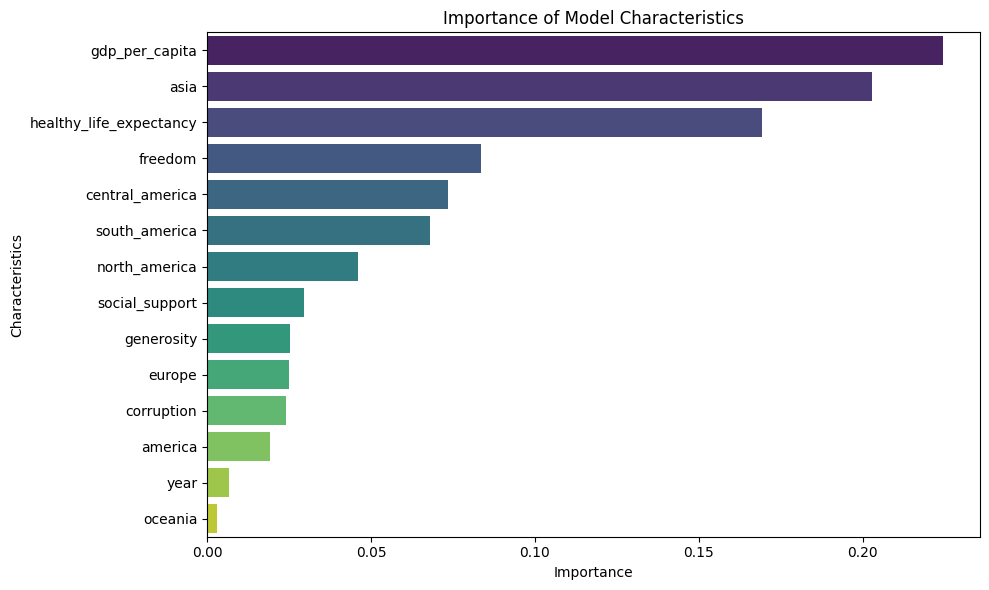

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Importance of Model Characteristics")
plt.xlabel("Importance")
plt.ylabel("Characteristics")
plt.tight_layout()
plt.show()